In [11]:
from agent import DDPGAgent, PIDAgent, ContinuousPolicyGradientAgent, ZeroAgent, RandomAgent, BaseAgent
from env import make_env
from train import Trainer
import matplotlib.pyplot as plt
from itertools import count
from IPython.display import display
plt.style.use('dark_background')

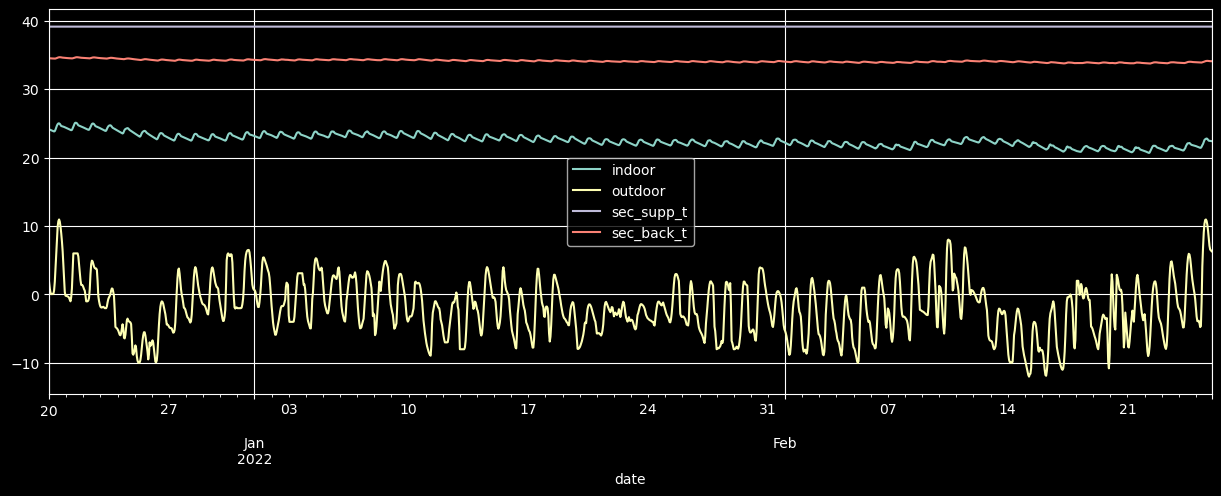

In [2]:
env = make_env('2021-12-20')
agent = ZeroAgent()
rewards = Trainer(agent, env).test()

(455544.0, 455832.0)

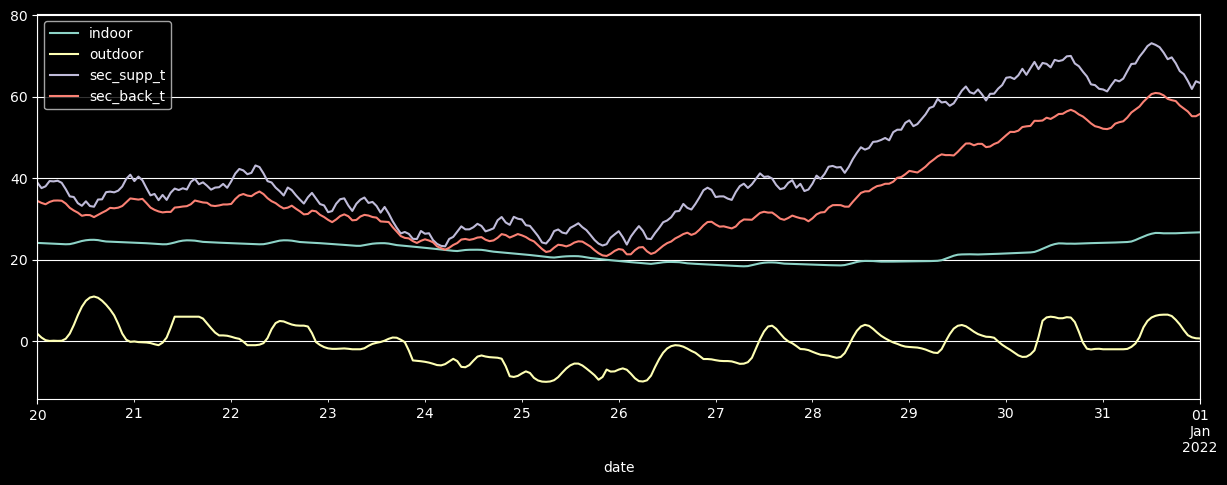

In [10]:
env = make_env('2021-12-20')
agent = RandomAgent()
rewards = Trainer(agent, env).test()
plt.xlim('2021-12-20', '2022-1-1')

(455544.0, 455832.0)

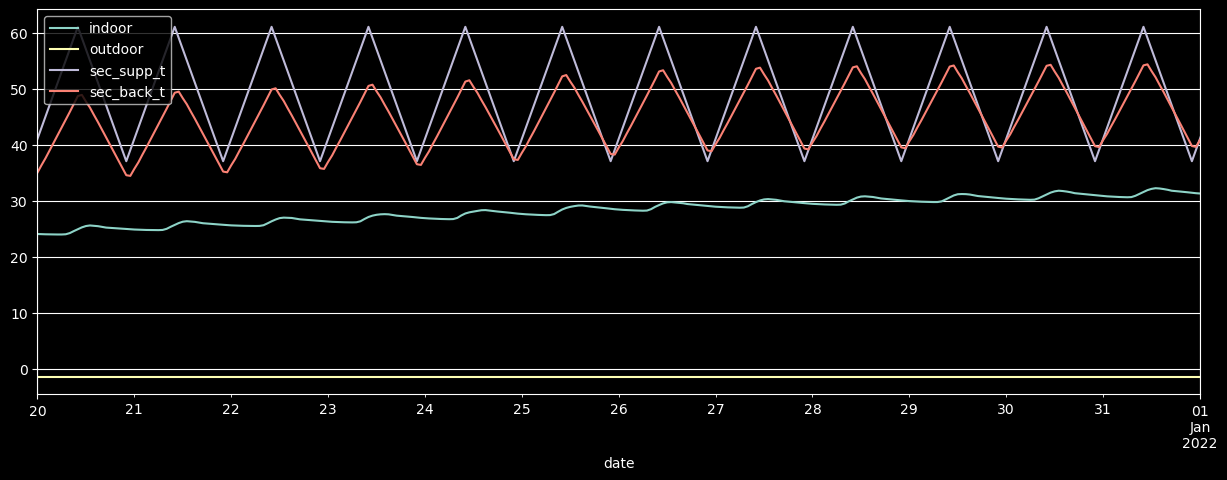

In [16]:
class TestAgent(BaseAgent):
    i = 0
    a = 2
    def predict(self, state):
        self.i += 1
        if self.i == 12:
            self.a *= -1
            self.i = 0
        return self.a, None

env = make_env('2021-12-20')
env.data['outdoor'] = env.data['outdoor'].mean()
agent = TestAgent()
rewards = Trainer(agent, env).test()
plt.xlim('2021-12-20', '2022-1-1')

In [8]:
print(env.data['indoor'].max())
print(env.data['indoor'].min())

26.0110256410256
22.2713157894736


<Axes: xlabel='date'>

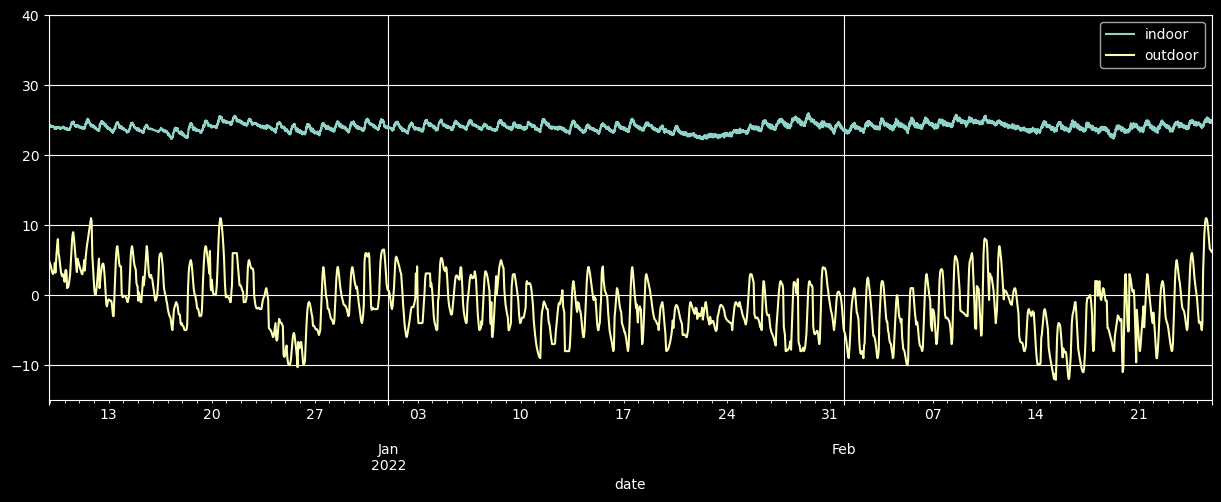

In [6]:
env.data[['indoor', 'outdoor']].plot(figsize=(15, 5), ylim=(-15, 40), grid=True)

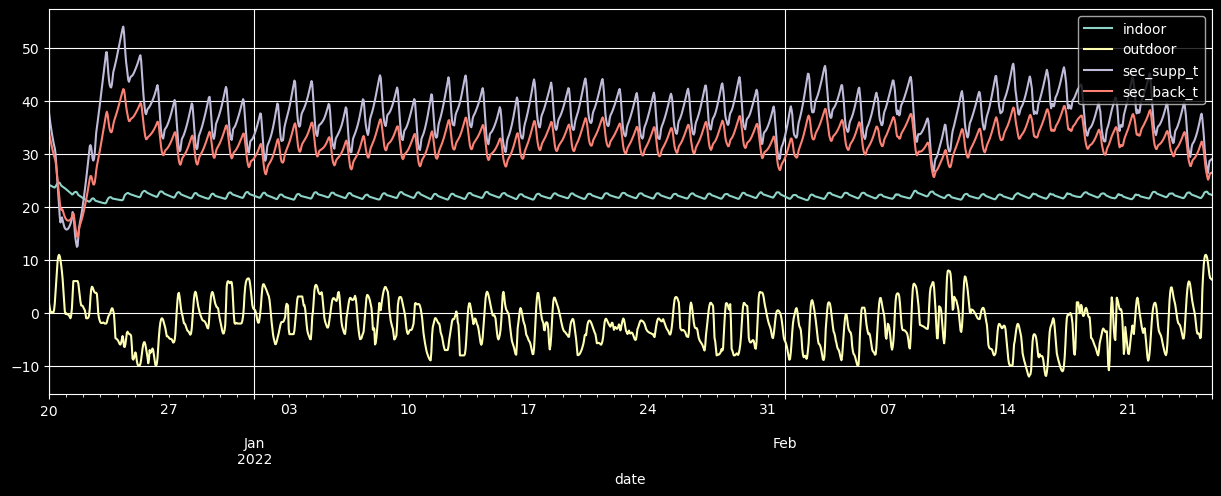

In [3]:
env = make_env('2021-12-20')
agent = PIDAgent(
    kp=0.7, kd=8, 
    indoor_col_idx=env.observation_cols.index('indoor_60min')
)
rewards = Trainer(agent, env).test()

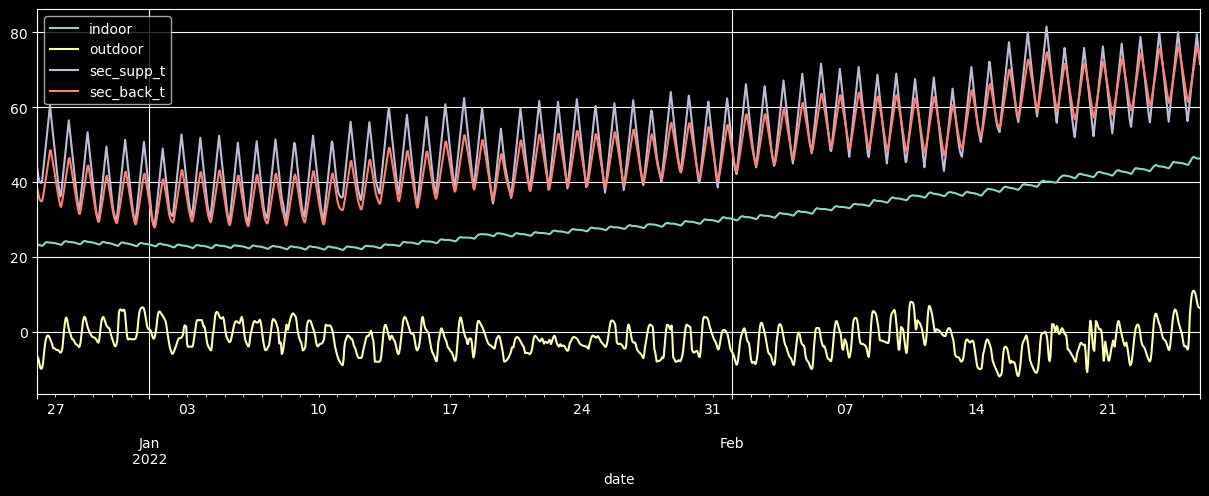

In [3]:
env = make_env()
trainer = Trainer(agent, env)
agent = DDPGAgent.load_from_checkpoint(
    checkpoint_path='runs/Jan02_11-28-44_epyc2/checkpoints/110-5874.421022115082.pth',
    hparams_file='runs/Jan02_11-28-44_epyc2/hparams.yaml'
)
rewards = trainer.test()